# Домашнее задание "Продвинутая линейная алгебра".

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!


In [187]:
import numpy as np

# # a) Диагональная, ортогональная, но не единичная(!)
d = np.array([[1,0],
              [0,-1]])
# в моей голове это тоже единичная матрица
print(np.dot(d, d.T))

# # b) Верхнетреугольная, ортогональная
# d = np.array([[?,?],
#               [0,?]])

# print(np.dot(d, d.T))

# c) Нижнетреугольная, ортогональная
# d = np.array([[?,0],
#               [?,?]])

# print(np.dot(d, d.T))

# # d) Матрица, у которой определитель = 1, и все элементы не равны 0
m = np.array([[0.2, 1, 1],
              [1, 0.4, 1],
              [1.1, 1, 0.5]])
print(np.linalg.det(m))

[[1.25 0.5 ]
 [0.5  1.  ]]
1.0


Найдите собственные значения и собственные вектора матриц:

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [82]:
m = np.array([[2, 2],
              [1, 3]])

x, y = np.linalg.eig(m)

i=0
while i < len(x):
    print(f'Собственное значение: {x[i]}, соответствующий вектор: {y[i]}')
    i+=1

Собственное значение: 1.0, соответствующий вектор: [-0.89442719 -0.70710678]
Собственное значение: 4.0, соответствующий вектор: [ 0.4472136  -0.70710678]


### Уровень 1:


Найдите спектральное разложение матрицы:

```
m = np.array([[1, 2],
              [2,3]])
print(m)
```


In [89]:
m = np.array([[1, 2],
              [2, 3]])

z, v = np.linalg.eig(m)

res = v @ np.diag(z) @ v.T

print(res)

[[1. 2.]
 [2. 3.]]


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*




Средний коэф. восстановления 1.8402290440293896 при числе компонентов 1
Средний коэф. восстановления 1.1408750164934398 при числе компонентов 2
Средний коэф. восстановления 0.683436241040513 при числе компонентов 3
Средний коэф. восстановления 0.2590290314917444 при числе компонентов 4
Средний коэф. восстановления 0.08393968365273428 при числе компонентов 5
Средний коэф. восстановления 0.002524849475787822 при числе компонентов 6
Средний коэф. восстановления 1.881111802970629e-15 при числе компонентов 7


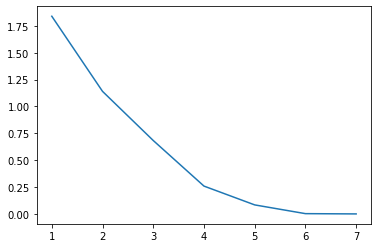

In [125]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()

a = []
i = 0
while i <= 9:
    a.append(digits.images[i])
    i+=1

x = [x for x in range(1,8,1)]
y = [] # all_res

for cnum in x:
    cnum_res = []
    for img in a:
        pca = PCA(n_components=cnum)
        pca.fit(img)
        zipped = pca.transform(img)
        unzipped = pca.inverse_transform(zipped)
        cnum_res.append(mean_squared_error(img, unzipped, squared=False))
    avg_res = sum(cnum_res) / len(cnum_res)
    y.append(avg_res)
    print(f'Средний коэф. восстановления {avg_res} при числе компонентов {cnum}')

plt.plot(x, y)


--------------------------------------------------------------------------------

У PCA есть метод transform и inverse_transform. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
